# D208 Predictive Modeling

In [1]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Part I: Research Question

## A1. Research Question
**Summarize one research question that is relevant to a real-world organizational situation captured in the data set you have selected and that you will answer using multiple linear regression in the initial model.**

My research question is: what are contributing factors related to a patient's length of stay? At a higher level, what variables directly influence the 'initial days' a patient stays in a hospital?

## B2. Goals of the Data Analysis. 
**Note: Ensure that your goals are within the scope of your research question and are represented in the available data.**

The goal of the data analysis is to discover which factors influence a patient's length of stay. By uncovering which variables are correlated, whether it be patient demographics, hospital procedures or similar details, medical hospitals can utilize these findings in multiple different way such as improving patient care through better practices. Examples of improving patient care include identifying the higher risk patients (those likely to have longer stays) to possibly come up with more targeted interventions and preventative care measures. As a result of the previously mentioned benefit, hospital resources may be more optimally allocated, resulting in quick patient turnover and reduced overall medical costs for both patients and medical centers.


In [4]:
df = pd.read_csv('medical_clean.csv')

## Part II: Method Justification

B.  Describe multiple linear regression methods by doing the following:

## B1.  Summarize four assumptions of a multiple linear regression model.
Multiple linear regression relies on four main assumptions. These four assumptions are **linearity, independence, homoscedasticity, and normality**.

Linearity is defined as an existing linear relationship between the dependent and independent variables. Any change applied to an independent variable will effect the dependent variable linearly. A simpler way to explain this is an existing "straight line relationship between two variables" (Investopedia Linear Relationship Definition, Formula, and Examples).

Independence is defined as the residuals being independent. Residuals are also known as the error, which is the difference between a predicted value and actual value $(y-\hat{y})$. Independence among residuals implies there is no correlation between residuals. In summary, the residuals are ***normally distributed***.

Furthermore on the subject of residuals, Homoscedasticity is defined as the variance of residuals remaining constant across all independent values. A good visual would be visualizing a scatterplot with the regression line and plotted residuals. In the case of homoscedascticity, the residuals should have similar variance from their respective predicted values. In contrast, heterosceascticity would not have a constant variance among the residuals, resulting in patterns such as cone-shapes, u-shapes, etc.. (Homoscedasticity - Statistics Solutions)

Normality -- ADD HERE


## B2.  Describe two benefits of using Python or R in support of various phases of the analysis.

Python is my choice of programming language due to it's ease of use and robust use in data science. Python has many versatile libraries including numpy (numerical python operations), pandas (used for manipulation of dataframes), scipy (used for statistical operations), and matplotlib and seaborn (strong versatile visualization packages).

During the wrangling phase, Python's pandas library proves to be incredibly useful for the manipulation of dataframes, including cleaning, transforming and creating new features. Numpy is also an analyst favorite with its' powerful performance with numerical operations on arrays, which is synonymical to dataframes.

Data exploration and statistics phases also greatly benefits from the various functions within Python. The visual libraries including matplotlib and seaborn has versatile graphs that provide easy access to quick insights. Distribution charts, scatterplots and heatmaps are a few of my most used functions that help me assess the distribution and relative relation to features within the dataset. This results in decreased need for computing power as well as reduction in redundancy.

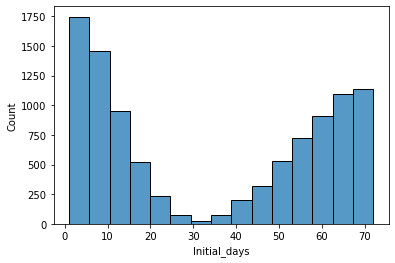

In [6]:
sns.histplot(data=df, x='Initial_days')
plt.show()

In [7]:
sorted(df.columns)

['Additional_charges',
 'Age',
 'Allergic_rhinitis',
 'Anxiety',
 'Area',
 'Arthritis',
 'Asthma',
 'BackPain',
 'CaseOrder',
 'Children',
 'City',
 'Complication_risk',
 'County',
 'Customer_id',
 'Diabetes',
 'Doc_visits',
 'Full_meals_eaten',
 'Gender',
 'HighBlood',
 'Hyperlipidemia',
 'Income',
 'Initial_admin',
 'Initial_days',
 'Interaction',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8',
 'Job',
 'Lat',
 'Lng',
 'Marital',
 'Overweight',
 'Population',
 'ReAdmis',
 'Reflux_esophagitis',
 'Services',
 'Soft_drink',
 'State',
 'Stroke',
 'TimeZone',
 'TotalCharge',
 'UID',
 'VitD_levels',
 'Zip',
 'vitD_supp']

## B3.  Explain why multiple linear regression is an appropriate technique to use for analyzing the research question summarized in part I.

This technique is an algorithm used for modeling the relationship between independent feature variables and the predictor variable. In this case, the research question dependent variable is length of stay. Multiple linear regression is an appropriate algorithm for use in predicting a variable considered to be (or used as) continuous.


This is suitable for the research question because it not only allows for simultaneous research of variables that influence a patient's length of stay, (e.g. a combination of patient characteristics, health conditions and lifestyle) it allows for a deep dive into what feature variables may be associated to a patient's stay in a hospital. By quantifying the relationships between patient demographics, hospital stay information etc. this technique offers valuable insights into the range of correlation the independent and predictor variable may have. 


Furthermore, the benefits of this technique allows one to see the direct interaction between each variable and how the direct influence each other. An example could be diabetes is much more pronounced in patients in certain cities.

## Part III. Data Cleaning/Preparation

**C.**  Summarize the data preparation process for multiple linear regression analysis by doing the following:

1.  Describe your data cleaning goals and the steps used to clean the data to achieve the goals that align with your research question including your annotated code.

Similarly to my previous data cleaning method from D206, my plan is to assess and clean the dataframe where necessary. Firstly, I assess the different data types of each column and change each accordingly to int, float, bool etc. as needed. Next, I assess any duplicates or nulls and handle those by either dropping, separating or imputing. My next step is usually assessing any outliers and making a plan on whether they will be separated, dropped or imputed. Lastly I take a thorough look into all of the data and entries to be sure everything programmatically makes sense. This step can include spelling, correcting typos and lower casing items to make them more readable.



To clean the dataset, I will start by making sure all zip codes are a minimum five digits by adding zeros at where needed, correcting data loss from the column previously being set as an integer. I will standardize the timezone column to fit the nine main time zones and then change to a the appropriate categorical data type. For the gender column, I will replace "prefer not to say" with "nonbinary". 

Columns like readmission, soft_drink, and various health-related columns that have yes/no answers will be changed to boolean data types. I will also round values in columns: vitd_levels, total_charge, and additional_charges to two decimal places. Columns like population, children, and income will be corrected to integer from float types.

Columns such as marital, gender, and other service related columns will be set as categorical data types. Anomalous columns like income appear within reasonable bounds and thus I decided on no further changes with regards to data imputation. Other columns with missing values (children, age, income, etc.) will have their nulls imputed using appropriate methods based on the data's distribution.

In [16]:
df.dtypes

CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain  


2.  Describe the dependent variable and all independent variables using summary statistics that are required to answer the research question, including a screenshot of the summary statistics output for each of these variables.

3.  Generate univariate and bivariate visualizations of the distributions of the dependent and independent variables, including the dependent variable in your bivariate visualizations.

4.  Describe your data transformation goals that align with your research question and the steps used to transform the data to achieve the goals, including the annotated code.

5.  Provide the prepared data set as a CSV file.

In [3]:
# read in dataframe
df = pd.read_csv('medical_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [6]:
df.columns.tolist()

['CaseOrder',
 'Customer_id',
 'Interaction',
 'UID',
 'City',
 'State',
 'County',
 'Zip',
 'Lat',
 'Lng',
 'Population',
 'Area',
 'TimeZone',
 'Job',
 'Children',
 'Age',
 'Income',
 'Marital',
 'Gender',
 'ReAdmis',
 'VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'vitD_supp',
 'Soft_drink',
 'Initial_admin',
 'HighBlood',
 'Stroke',
 'Complication_risk',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma',
 'Services',
 'Initial_days',
 'TotalCharge',
 'Additional_charges',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']

(array([2563., 1586.,  669.,  157.,   34.,  271.,  546., 1033., 1451.,
        1690.]),
 array([ 1.00198092,  8.09993183, 15.19788274, 22.29583364, 29.39378455,
        36.49173546, 43.58968637, 50.68763728, 57.78558818, 64.88353909,
        71.98149   ]),
 <BarContainer object of 10 artists>)

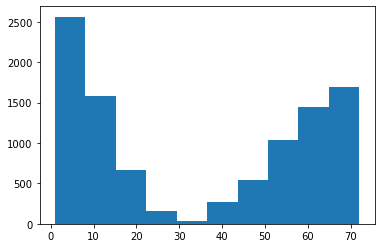

In [13]:
plt.hist(df.Initial_days)

## Part IV: Model Comparison and Analysis

D.  Compare an initial and a reduced linear regression model by doing the following:

1.  Construct an initial multiple linear regression model from all independent variables that were identified in part C2.

2.  Justify a statistically based feature selection procedure or a model evaluation metric to reduce the initial model in a way that aligns with the research question.

3.  Provide a reduced linear regression model that follows the feature selection or model evaluation process in part D2, including a screenshot of the output for each model.






E.  Analyze the data set using your reduced linear regression model by doing the following:

1.  Explain your data analysis process by comparing the initial multiple linear regression model and reduced linear regression model, including the following element:

•   a model evaluation metric

2.  Provide the output and all calculations of the analysis you performed, including the following elements for your reduced linear regression model:

•   a residual plot

•   the model’s residual standard error

3.  Provide an executable error-free copy of the code used to support the implementation of the linear regression models using a Python or R file.


## Part V: Data Summary and Implications

F.  Summarize your findings and assumptions by doing the following:

1.  Discuss the results of your data analysis, including the following elements:

•   a regression equation for the reduced model

•   an interpretation of the coefficients of the reduced model

•   the statistical and practical significance of the reduced model

•   the limitations of the data analysis

2.  Recommend a course of action based on your results.



Part VI: Demonstration

G.  Provide a Panopto video recording that includes the presenter and a vocalized demonstration of the functionality of the code used for the analysis of the programming environment, including the following elements:

•   an identification of the version of the programming environment

•   a comparison of the initial multiple linear regression model you used and the reduced linear regression model you used in your analysis

•   an interpretation of the coefficients of the reduced model


Note: The audiovisual recording should feature you visibly presenting the material (i.e., not in voiceover or embedded video) and should simultaneously capture both you and your multimedia presentation.


Note: For instructions on how to access and use Panopto, use the "Panopto How-To Videos" web link provided below. To access Panopto's website, navigate to the web link titled "Panopto Access," and then choose to log in using the “WGU” option. If prompted, log in using your WGU student portal credentials, and then it will forward you to Panopto’s website.


To submit your recording, upload it to the Panopto drop box titled “Regression Modeling – NBM3 | D208.” Once the recording has been uploaded and processed in Panopto's system, retrieve the URL of the recording from Panopto and copy and paste it into the Links option. Upload the remaining task requirements using the Attachments option.



H.  List the web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.


I.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.


J.  Demonstrate professional communication in the content and presentation of your submission.

## Sources
[Investopedia - Linear Relationship Definition](https://www.investopedia.com/terms/l/linearrelationship.asp)

[Residual Analysis for Independence (helpful image for visualization)](https://dev.to/ungest/independence-of-errors-a-guide-to-validating-linear-regression-assumptions-4h6b)

[Homoscedasticity - Statistics SolutionsPart IV: Model Comparison and Analysis

D.  Compare an initial and a reduced linear regression model by doing the following:

1.  Construct an initial multiple linear regression model from all independent variables that were identified in part C2.

2.  Justify a statistically based feature selection procedure or a model evaluation metric to reduce the initial model in a way that aligns with the research question.

3.  Provide a reduced linear regression model that follows the feature selection or model evaluation process in part D2, including a screenshot of the output for each model.
](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/homoscedasticity/)